## 檔案讀取查詢

In [5]:
import csv
inValue = input("輸入郵遞區號:")
with open('HW16__Data.csv',encoding='utf-8') as data:
    csvList = csv.reader(data)
    for d in csvList:
        if d[2] == inValue:
            print(d[0],d[1],d[2],d[3])

輸入郵遞區號:104
中山分局 Zhongshan Precinct 104 臺北市中山區中山北路2段1號
中山一派出所 Zhongshan First Police Station 104 臺北市中山區中山北路1段110號
中山二派出所 Zhongshan Second Police Station 104 臺北市中山區中山北路2段90號
圓山派出所 Yuanshan Police Staticn 104 臺北市中山區中山北路3段62號
長春路派出所 Changchun Rd. Police Station 104 臺北市中山區長春路206號
長安東路派出所 Changan E. Rd. Police Station 104 臺北市中山區長安東路2段165號
民權一派出所 Minquan First Police Station 104 臺北市中山區新生北路2段127之1號
建國路派出所 Jianguo Police Station 104 臺北市中山區民族東路284號
大直派出所 Dazhi Police Station 104 臺北市中山區北安路456號


In [8]:
import pandas as pd
data = pd.read_csv('HW17__Data.csv')
for v in data.columns:
    if v != '行業別':
        print(f"{v}平均值為:{data[v].mean():.2f}")
    else:
        print(f"行業筆數:{data[v].count()}")

行業筆數:111
經常性薪資平均值為:27764.80
專業人員-經常性薪資平均值為:33162.01
技術員及助理專業人員-經常性薪資平均值為:28917.55
事務支援人員-經常性薪資平均值為:26588.43
服務及銷售工作人員-經常性薪資平均值為:22083.83
技藝_機械設備操作及組裝人員-經常性薪資平均值為:23405.24
基層技術工及勞力工-經常性薪資平均值為:19570.29


### axis=0 求均值

In [13]:
import pandas as pd
import numpy as np
empl_df = pd.DataFrame({
    'Name': ["Jon", "Jon", "Mike", "Luna", "Sam", "Aliza"],
    'Age': [30, 33, 35, 30, 30, 31],
    'Weight(KG)': [75, 75, 80, 70, 73, 70],
    'Height(meters)': [1.7, 1.7, 1.85, 1.75, np.nan, 1.75],
    'Salary($)': [3300, 3500, 4000, 3050, np.nan, 3700]
})
print("DataFrame is:")
print(empl_df,"\n")
print(list(empl_df.groupby('Name',axis = 0)))
print("=================")
print(empl_df.groupby('Name',axis=0).sum())
print("=================")
print(empl_df.groupby('Name',axis= 0).count())
print("=================")
print(empl_df.groupby('Name',axis = 0).size())

DataFrame is:
    Name  Age  Weight(KG)  Height(meters)  Salary($)
0    Jon   30          75            1.70     3300.0
1    Jon   33          75            1.70     3500.0
2   Mike   35          80            1.85     4000.0
3   Luna   30          70            1.75     3050.0
4    Sam   30          73             NaN        NaN
5  Aliza   31          70            1.75     3700.0 

[('Aliza',     Name  Age  Weight(KG)  Height(meters)  Salary($)
5  Aliza   31          70            1.75     3700.0), ('Jon',   Name  Age  Weight(KG)  Height(meters)  Salary($)
0  Jon   30          75             1.7     3300.0
1  Jon   33          75             1.7     3500.0), ('Luna',    Name  Age  Weight(KG)  Height(meters)  Salary($)
3  Luna   30          70            1.75     3050.0), ('Mike',    Name  Age  Weight(KG)  Height(meters)  Salary($)
2  Mike   35          80            1.85     4000.0), ('Sam',   Name  Age  Weight(KG)  Height(meters)  Salary($)
4  Sam   30          73             NaN   

In [15]:
import pandas as pd

empl_df = pd.DataFrame({  
    'A': [30, 33, 35, 30, 30, 31],
    'B': [75, 75, 80, 70, 73, 70],
    'C': [80, 90, 75, 83, 97, 66],
    'D': [57, 83, 72, 96, 88, 25]
},index=["Ken","Vivin","Lindy","Iris","Gigi","Lucy"])
print("The Employee DataFrame is:")
print(empl_df,"\n")
mapping_dict = {'A':'Python', 'B':'Python', 'C':'Java', 'D':'C++'}
print(empl_df.groupby(mapping_dict,axis=1).mean())


The Employee DataFrame is:
        A   B   C   D
Ken    30  75  80  57
Vivin  33  75  90  83
Lindy  35  80  75  72
Iris   30  70  83  96
Gigi   30  73  97  88
Lucy   31  70  66  25 

        C++  Java  Python
Ken    57.0  80.0    52.5
Vivin  83.0  90.0    54.0
Lindy  72.0  75.0    57.5
Iris   96.0  83.0    50.0
Gigi   88.0  97.0    51.5
Lucy   25.0  66.0    50.5


## 功能聚合與重新採樣
+ 我們可針對數值資料進行各種計算。
+ 聚合代表 .agg( ) 這個動作：
   + 可以整併各種計算為多個 column 輸出。
   + 分組後也可以利用可以進行各組的資料計算。
+ 我們可針對物件進行 resample( ) 動作進行重新採樣，藉此調整日期時間資料的出現頻率。
+ [time offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

### pandas028原型

In [17]:
import pandas as pd
df = pd.read_csv('salesv3.csv',encoding="utf-8")
df["date"]= pd.to_datetime(df['date'])
print(df.head())
print(df)

   account number                         name       sku  quantity  \
0          740150                   Barton LLC  B1-20000        39   
1          714466              Trantow-Barrows  S2-77896        -1   
2          218895                    Kulas Inc  B1-69924        23   
3          307599  Kassulke, Ondricka and Metz  S1-65481        41   
4          412290                Jerde-Hilpert  S2-34077         6   

   unit price  ext price                date  
0       86.69    3380.91 2014-01-01 07:21:51  
1       63.16     -63.16 2014-01-01 10:00:47  
2       90.70    2086.10 2014-01-01 13:24:58  
3       21.05     863.05 2014-01-01 15:05:22  
4       83.21     499.26 2014-01-01 23:26:55  
      account number                          name       sku  quantity  \
0             740150                    Barton LLC  B1-20000        39   
1             714466               Trantow-Barrows  S2-77896        -1   
2             218895                     Kulas Inc  B1-69924        23   
3

In [21]:
import pandas028
c = pandas028.df.set_index('date').groupby('name',sort=True)["ext price"].resample("A-DEC").sum()#A-DEC表示12月作為結束的一整年
print(c)
print("==========================")
d = pandas028.df.set_index("date").resample("M")["ext price"].sum()
print(d)
e = pandas028.df.set_index("date").groupby("name")["ext price"].resample("M").sum()
print(e)

name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-31    103569.59
Fritsch, Russel and Anderson     2014-12-31    112214.71
Halvorson, Crona and Champlin    2014-12-31     70004.36
Herman LLC                       2014-12-31     82865.00
Jerde-Hilpert                    2014-12-31    112591.43
Kassulke, Ondricka and Metz      2014-12-31     86451.07
Keeling LLC                      2014-12-31    100934.30
Kiehn-Spinka                     2014-12-31     99608.77
Koepp Ltd                        2014-12-31    103660.54
Kuhn-Gusikowski                  2014-12-31     91094.28
Kulas Inc                        2014-12-31    137351.96
Pollich LLC                      2014-12-31     87347.18
Purdy-Kunde                      2014-12-31     77898.21
Sanford and Sons                 2014-12-31     98822.98
Stokes LLC                       2014-12-31 

In [24]:
import pandas028
import datetime
a = pandas028.df.groupby(['name',pandas028.pd.Grouper(key="date",freq="M")])["ext price"].sum()
print(a)
print("====================")
b = pandas028.df.groupby(['name',pandas028.pd.Grouper(key="date",freq="A-DEC")])["ext price"].sum()
print(b)

name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.17
                            ...   
Will LLC    2014-08-31     1439.82
            2014-09-30     4345.99
            2014-10-31     7085.33
            2014-11-30     3210.44
            2014-12-31    12561.21
Name: ext price, Length: 240, dtype: float64
name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-31    103569.59
Fritsch, Russel and Anderson     2014-12-31    112214.71
Halvorson, Crona and Champlin    2014-12-31     70004.36
Herman LLC                       2014-12-31     82865.00
Jerde-Hilpert                    2014-12-31    112591.43
Kassulke, Ondricka and Metz      2014-12-31     86451.07
Keeling LLC                      2014-12-31    

### 功能聚合

In [26]:
import pandas028
#"ext price", "quantity"
a = pandas028.df[["ext price","quantity"]].sum()
b = pandas028.df["unit price"].mean()
print(a)
print("=========================")
print(b)
print("=========================")
c = pandas028.df[["ext price","quantity","unit price"]].agg(['sum','mean'])
print(c)
print("=========================================")

ext price    2018784.32
quantity       36463.00
dtype: float64
55.00752666666659
         ext price      quantity    unit price
sum   2.018784e+06  36463.000000  82511.290000
mean  1.345856e+03     24.308667     55.007527


### value_counts 統計出現次數

In [34]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'X':[1,2,3,np.nan,3],
                  'Y':[4,np.nan,8,np.nan,3]})
print(df)
print("=====================")
a_count1 = df["X"].value_counts()
print(a_count1)
a_count2 = df["Y"].value_counts(dropna=False)
print(a_count2)
print(a_count1.index[0])# 出現頻率最高的

     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
3.0    2
1.0    1
2.0    1
Name: X, dtype: int64
NaN    2
4.0    1
8.0    1
3.0    1
Name: Y, dtype: int64
3.0


In [37]:
import pandas028
a = pandas028.df.agg({'ext price':['sum','mean'],'quantity':['sum','mean'],'unit price':['mean']})
print(a)
get_max = lambda x : x.value_counts(dropna=False).index[0]
b = pandas028.df.agg({'ext price':['sum','mean'],'quantity':['sum','mean'],'unit price':['mean'],'sku':[get_max]})
print(b)
get_max.__name__ = "most frequent"
c = pandas028.df.agg({'ext price':['sum','mean'],'quantity':['sum','mean'],'unit price':['mean'],'sku':[get_max]})
print(c)

         ext price      quantity  unit price
sum   2.018784e+06  36463.000000         NaN
mean  1.345856e+03     24.308667   55.007527
             ext price      quantity  unit price       sku
sum       2.018784e+06  36463.000000         NaN       NaN
mean      1.345856e+03     24.308667   55.007527       NaN
<lambda>           NaN           NaN         NaN  S2-77896
                  ext price      quantity  unit price       sku
sum            2.018784e+06  36463.000000         NaN       NaN
mean           1.345856e+03     24.308667   55.007527       NaN
most frequent           NaN           NaN         NaN  S2-77896


In [45]:
import pandas027
import numpy as np
print(pandas027.df)
grouped = pandas027.df.groupby("Team")
print(type(grouped))
print("========================")
print(grouped.first())
print("========================")
print(grouped.agg("size"))
print("========================")
print(grouped.agg(np.size))
print("========================")
print(grouped.agg(lambda x:np.size(x)))

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
dtype: int64
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      3     3       3
Riders     4     4       4
Royals     2     2       2
kings      1     1       1
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings

In [46]:
import pandas027
import numpy as np
grouped = pandas027.df.groupby('Team')
print(grouped['Points'].agg([np.sum,np.mean,np.std]))

         sum        mean         std
Team                                
Devils  1536  768.000000  134.350288
Kings   2285  761.666667   24.006943
Riders  3049  762.250000   88.567771
Royals  1505  752.500000   72.831998
kings    812  812.000000         NaN


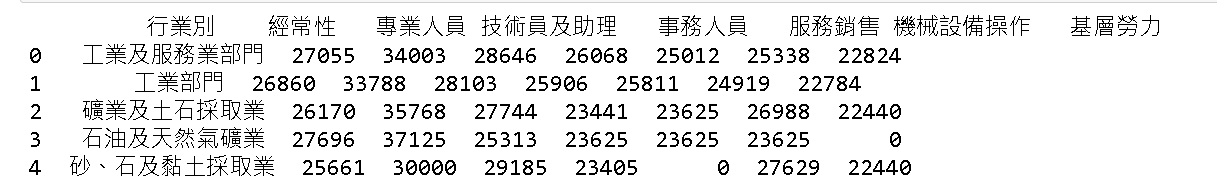

# 資料合併 

## 資料合併 
+ merge( ) 方法可作為 DataFrame 對象之間的連結方式。
 + 裡面必須加入的參數為兩個 DataFrame 對象。
 + on 這個參數指的是用於連接的 Column 索引名稱。
   + 必須存在左右兩個 DataFrame 對象中，如果沒有指定且其他參數也未指定則以兩個 DataFrame 的列名交集做為連接鍵。
   + 如果指定的 Column 於兩個 DataFrame 上的名稱不同，則可以透過 left_on 與 right_on 兩個參數分別指定。
 + how( ) 這個參數是指左右兩個對象中存在不重合的鍵合併連接的方式：
   + inner：預設，代表交集 (內連接)。
   + outer：代表並集 (外連接)。
   + left：代表左外連接。
   + right：代表右外連接。
 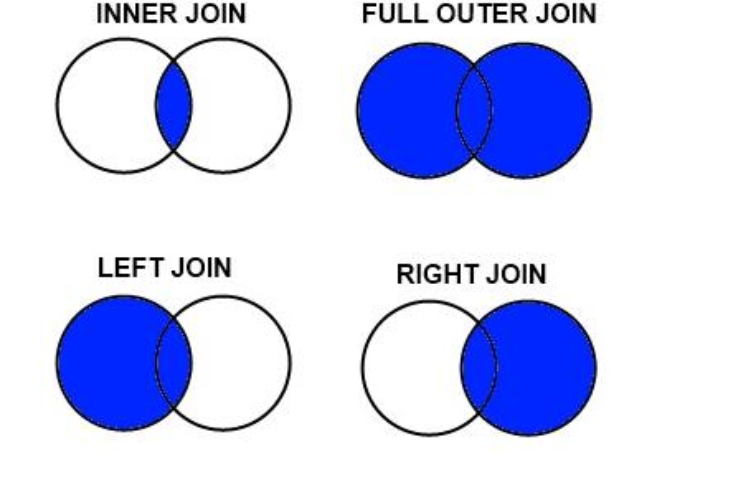  

### 資料合併的原始資料

In [47]:
import pandas as pd
left = pd.DataFrame({ 'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("--------------------")
print(right)
print("--------------------")

   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5
--------------------
   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5
--------------------


In [57]:
import pandas030
pd1 = pandas030.pd
print(type(pd1))
left1 = pandas030.left
right1 = pandas030.right
print("-----id-----")
print(pd1.merge(left1,right1,on="id"))
print("-----id  subject_id-----")
print(pd1.merge(left1,right1,on=['id','subject_id']))
print("-----left-----")
print(pd1.merge(left1,right1,on='subject_id' ,how='left'))
print("-----right-----")
print(pd1.merge(left1,right1,on='subject_id' ,how='right'))
print("-----outer-----")
print(pd1.merge(left1,right1,on='subject_id' ,how='outer'))
print("-----inner-----")
print(pd1.merge(left1,right1,on='subject_id' ,how='inner'))
print(pd1.merge(left1,right1,on='subject_id' ))

<class 'module'>
-----id-----
   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5
-----id  subject_id-----
   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty
-----left-----
   id_x  Name_x subject_id  id_y Name_y
0     1    Alex       sub1   NaN    NaN
1     2     Amy       sub2   1.0  Billy
2     3   Allen       sub4   2.0  Brian
3     4   Alice       sub6   4.0  Bryce
4     5  Ayoung       sub5   5.0  Betty
-----right-----
   id_x  Name_x subject_id  id_y Name_y
0   2.0     Amy       sub2     1  Billy
1   3.0   Allen       sub4     2  Brian
2   NaN     NaN       sub3     3   Bran
3   4.0   Alice       sub6     4  Bryce
4   5.0  Ayoung       sub5     5  Betty
-----outer-----
   id_x  Name_x subject_id  id_y Name_y


In [59]:
import pandas as pd
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject1':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject2':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("===============================")
print(right)
print("===============================")
print(pd.merge(left,right,left_on="subject1",right_on="subject2",how="left"))
print(pd.merge(left,right,left_on="subject1",right_on="subject2"))

   id    Name subject1
0   1    Alex     sub1
1   2     Amy     sub2
2   3   Allen     sub4
3   4   Alice     sub6
4   5  Ayoung     sub5
   id   Name subject2
0   1  Billy     sub2
1   2  Brian     sub4
2   3   Bran     sub3
3   4  Bryce     sub6
4   5  Betty     sub5
   id_x  Name_x subject1  id_y Name_y subject2
0     1    Alex     sub1   NaN    NaN      NaN
1     2     Amy     sub2   1.0  Billy     sub2
2     3   Allen     sub4   2.0  Brian     sub4
3     4   Alice     sub6   4.0  Bryce     sub6
4     5  Ayoung     sub5   5.0  Betty     sub5
   id_x  Name_x subject1  id_y Name_y subject2
0     2     Amy     sub2     1  Billy     sub2
1     3   Allen     sub4     2  Brian     sub4
2     4   Alice     sub6     4  Bryce     sub6
3     5  Ayoung     sub5     5  Betty     sub5
